## Observations and Insights 

Observations: 
    1. When looking at the summary statistics table, you can see that Ramicane and Capomulin have the lowest average tumor volume as well as the lowest variance.  This shows that these drugs are the most effective at shrinking tumor sizes.  
    2. The bar charts show that Capomulin and Ramicane had more measurements taken than the rest of the drug regimens.  Having a larger set of data to pull from makes the data more reliable. No outliers are seen in the box plots for these drugs so all the data is accounted for. 
    3. Lastly, we can also see a strong positive correlation between weight and tumor size.  This makes sense because the tumor itself has weight so if the tumor is shrinking, the mouse is losing weight. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_research_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_research_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_research_data['Mouse ID'].value_counts())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
clean_df = combined_research_data.loc[combined_research_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"]
                                       

In [4]:
clean_df

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_research_data.loc[combined_research_data["Mouse ID"] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
print(len(combined_research_data))
print(len(clean_df))

1893
5


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_research_data.loc[combined_research_data["Mouse ID"] != 'g989']

In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].value_counts())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = clean_df.groupby('Drug Regimen')
tumor_data = summary_stats['Tumor Volume (mm3)']

tumor_mean = (tumor_data).mean()
tumor_median = (tumor_data).median()
tumor_variance = (tumor_data).var()
tumor_stdev = (tumor_data).std()
tumor_sem = (tumor_data).sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({"Mean": tumor_mean,
                                "Median": tumor_median,
                                "Variance": tumor_variance,
                                "Standard Deviation": tumor_stdev,
                                "Standard Error of Mean": tumor_sem})
summary_stats_df

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = clean_df.groupby('Drug Regimen').agg({"Tumor Volume (mm3)": 
                                                    ["mean", "median", "var", "std", "sem"]})
summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

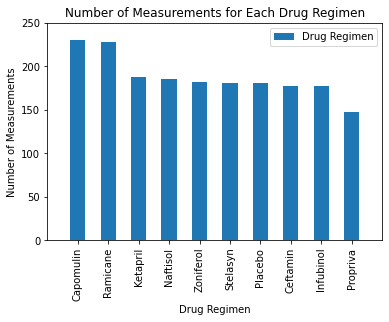

In [79]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
pandas_bar_plot = clean_df['Drug Regimen'].value_counts().plot.bar()

pandas_bar_plot.set_xlabel("Drug Regimen")
pandas_bar_plot.set_ylabel("Number of Measurements")
pandas_bar_plot.set_title("Number of Measurements for Each Drug Regimen")

plt.legend(loc='best')
plt.xlim(-1, 10)
plt.ylim(0, 250)

plt.show()

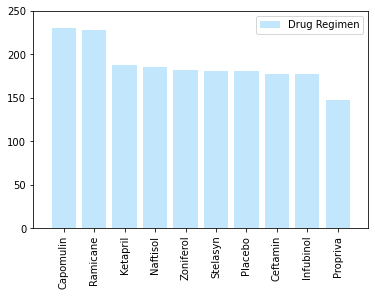

In [82]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_regimen = clean_df['Drug Regimen'].value_counts()
x_axis = np.arange(len(drug_regimen))
bar_labels = "Drug Regimen"

plt.bar(x_axis, drug_regimen, color='lightskyblue', label=bar_labels, alpha=0.5, align='center')

plt.legend(loc='best')
plt.xlim(-1, 10)
plt.ylim(0, 250)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen.index.values, rotation='vertical')
plt.show()

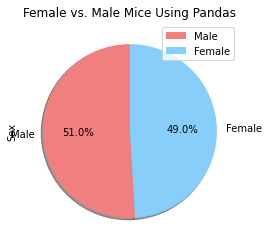

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pandas_pie = clean_df['Sex'].value_counts()
colors = ["lightcoral", "lightskyblue"]

pandas_pie_plot = pandas_pie.plot.pie(title='Female vs. Male Mice Using Pandas', labels=pandas_pie.index.values, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.legend(loc='best')

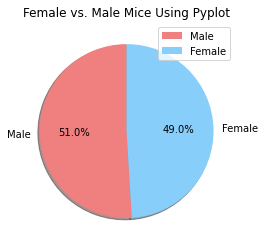

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(pandas_pie, labels=pandas_pie.index.values, colors = ["lightcoral", "lightskyblue"], autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('Female vs. Male Mice Using Pyplot')
plt.legend(loc='best')

## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_data = pd.DataFrame(clean_df.groupby('Mouse ID')['Timepoint'].max())
                                        
# Find max timepoint for each mouse
timepoint_data = timepoint_data.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
updated_df = pd.merge(clean_df, timepoint_data, on=["Mouse ID", "Timepoint"])

updated_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [16]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []


for treatment in treatments:
    treatment_df = updated_df.loc[updated_df["Drug Regimen"] == treatment]    
 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
    tumor_volume = treatment_df["Tumor Volume (mm3)"]
    tumor_data.append(tumor_volume)
    
    # add subset     
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_occupancy = tumor_volume.loc[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]

    print(outlier_occupancy)

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


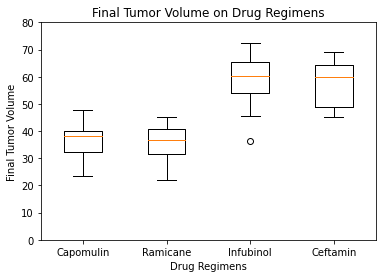

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_data, labels=treatments)
plt.title("Final Tumor Volume on Drug Regimens")
plt.xlabel("Drug Regimens")
plt.ylabel("Final Tumor Volume")

plt.xlim(0.5, 4.5)
plt.ylim(0, 80)

plt.show()


## Line and Scatter Plots

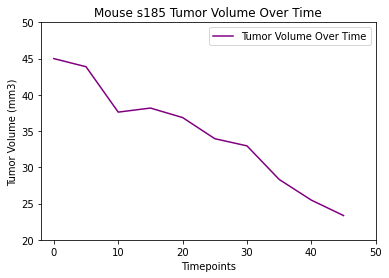

In [69]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"] == "s185"]

x_line = capomulin_mouse["Timepoint"]
y_line = capomulin_mouse["Tumor Volume (mm3)"]

line_label = "Tumor Volume Over Time"

capomulin_mouse_plot = plt.plot(x_line, y_line, label=line_label, color='purple')
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-2, 50)
plt.ylim(20, 50)
plt.title("Mouse s185 Tumor Volume Over Time")
plt.legend(loc='best')
plt.show()

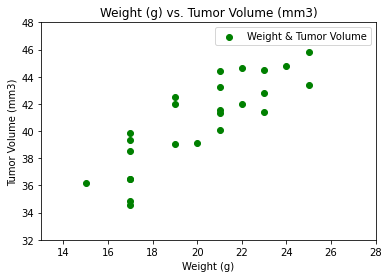

In [74]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_avg = capomulin.groupby(capomulin["Mouse ID"]).mean()

x_scatter = capomulin_avg["Weight (g)"]
y_scatter = capomulin_avg["Tumor Volume (mm3)"]

scatter_label = "Weight & Tumor Volume"

plt.scatter(x_scatter, y_scatter, label= scatter_label, color='green')
plt.title("Weight (g) vs. Tumor Volume (mm3)")
plt.legend(loc='best')
plt.xlim(13, 28)
plt.ylim(32, 48)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation coefficient is: 0.8419363424694718
The r-squared is: 0.7088568047708717


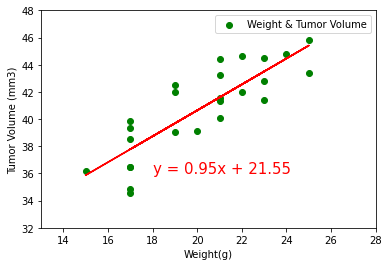

In [75]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_scatter = capomulin_avg["Weight (g)"]
y_scatter = capomulin_avg["Tumor Volume (mm3)"]
scatter_label = "Weight & Tumor Volume"

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_scatter, y_scatter)
regress_values = x_scatter * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_scatter, y_scatter, label=scatter_label, color="green")
plt.plot(x_scatter, regress_values, "r-")
plt.annotate(line_eq, (18, 36), fontsize=15, color="red")
plt.legend(loc='best')
plt.xlim(13, 28)
plt.ylim(32, 48)
plt.xlabel('Weight(g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation coefficient is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()